# Project Sprint 2 - Multiple Linear Regression

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection  import train_test_split

## Reviewing the Baseball teams data

### Defensive Measurements:
- Runs Against
- Earned Runs
- Earned Run Average
- Complete Games
- Shutout
- Saves
- Infield Put Outs
- Hits Allowed
- Home Run Allowed
- Walks Allowed
- Strikeouts Allowed
- Errors
- Double Plays
- Fielding Percentage
### Offensive Measurements:
- Runs Scored
- At Bats
- Hits
- Doubles
- Triples
- Home Runs
- Walks
- Strike Outs
- Stolen Bases
- Caught Stealing
- Hit By Pitch
- Sacrifice Fly

In [2]:
df = pd.read_csv('baseball_teams.csv')

In [3]:
df.head()

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,367,2,42,23,225,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,308,6,28,22,218,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,346,13,53,34,223,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,261,5,21,17,163,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,373,7,42,22,227,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN


In [4]:
df.tail()

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
2800,2015,NL,LAN,LAD,W,1,162,81.0,92,70,...,1317,145,395,1396,75,133.0,0.988,Los Angeles Dodgers,Dodger Stadium,3764815.0
2801,2015,NL,SFN,SFG,W,2,162,81.0,84,78,...,1344,155,431,1165,78,145.0,0.987,San Francisco Giants,AT&T Park,3375882.0
2802,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,1450,182,500,1215,86,146.0,0.986,Arizona Diamondbacks,Chase Field,2080145.0
2803,2015,NL,SDN,SDP,W,4,162,81.0,74,88,...,1371,171,516,1393,92,138.0,0.985,San Diego Padres,Petco Park,2459742.0
2804,2015,NL,COL,COL,W,5,162,81.0,68,94,...,1579,183,579,1112,95,171.0,0.985,Colorado Rockies,Coors Field,2506789.0


In [5]:
df.shape

(2805, 43)

In [6]:
# Create an index that states the year and the team for research.
df["Year_Team"] = df["Year "].astype(str) + '-'+ df["Team_Name"].astype(str)

In [261]:
df.set_index('Year_Team')

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
Year_Team,,,,,,,,,,,,,,,,,,,,,
1871-Boston Red Stockings,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,367,2,42,23,225,NaN,0.830,Boston Red Stockings,South End Grounds I,NaN
1871-Chicago White Stockings,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,308,6,28,22,218,NaN,0.820,Chicago White Stockings,Union Base-Ball Grounds,NaN
1871-Cleveland Forest Citys,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,346,13,53,34,223,NaN,0.810,Cleveland Forest Citys,National Association Grounds,NaN
1871-Fort Wayne Kekiongas,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,261,5,21,17,163,NaN,0.800,Fort Wayne Kekiongas,Hamilton Field,NaN
1871-New York Mutuals,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,373,7,42,22,227,NaN,0.830,New York Mutuals,Union Grounds (Brooklyn),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-Los Angeles Dodgers,2015,NL,LAN,LAD,W,1,162,81.0,92,70,...,1317,145,395,1396,75,133.0,0.988,Los Angeles Dodgers,Dodger Stadium,3764815.0
2015-San Francisco Giants,2015,NL,SFN,SFG,W,2,162,81.0,84,78,...,1344,155,431,1165,78,145.0,0.987,San Francisco Giants,AT&T Park,3375882.0
2015-Arizona Diamondbacks,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,1450,182,500,1215,86,146.0,0.986,Arizona Diamondbacks,Chase Field,2080145.0


In [7]:
# Checking for missing values as it may affect calculations for the model.
df.isnull().sum()

Year                      0
League                   50
Team                      0
Franchise                 0
Division               1517
Final_Standing            0
Games_Played              0
Unnamed: 7              399
Games_Won                 0
Games_Lost                0
Unnamed: 10            1545
Unnamed: 11            2181
League_Win               28
World_Series            357
Runs_Scored               0
At_Bats                   0
Hits                      0
Doubles                   0
Triples                   0
Home_Runs                 0
Walks                     0
Strike_Outs             120
Stolen_Bases            144
Caught_Stealing         859
Hit_By_Pitch           2325
Sacrifice_Fly          2325
Runs_Against              0
Earned_Runs               0
Earned_Run_Average        0
Complete_Games            0
Shutout                   0
Saves                     0
Infield_Put_Outs          0
Hits_Allowed              0
Home_Run_Allowed          0
Walks_Allowed       

### Create a time periods of data

    Period 1 - before 1920
    Period 2 - 1920 to 1960
    Period 3 - 1960 to 1990
    Period 4 - 1990 to 2010

In [203]:
df.columns

Index(['Year ', 'League', 'Team ', 'Franchise ', 'Division', 'Final_Standing',
       'Games_Played', 'Unnamed: 7', 'Games_Won', 'Games_Lost', 'Unnamed: 10',
       'Unnamed: 11', 'League_Win', 'World_Series', 'Runs_Scored', 'At_Bats',
       'Hits', 'Doubles', 'Triples', 'Home_Runs', 'Walks', 'Strike_Outs',
       'Stolen_Bases', 'Caught_Stealing', 'Hit_By_Pitch', 'Sacrifice_Fly',
       'Runs_Against', 'Earned_Runs', 'Earned_Run_Average', 'Complete_Games',
       'Shutout', 'Saves', 'Infield_Put_Outs', 'Hits_Allowed',
       'Home_Run_Allowed', 'Walks_Allowed', 'Strikeouts_Allowed', 'Errors',
       'Double_Plays', 'Fielding_Percentage', 'Team_Name', 'Home_Ball_Park',
       'Attendance', 'Year_Team'],
      dtype='object')

In [10]:
Period_1 = df[df['Year '] < 1920]
Period_2 = df[(df['Year '] >= 1920) & (df['Year '] <= 1960)]
Period_3 = df[(df['Year '] >= 1960) & (df['Year '] <= 1990)]
Period_4 = df[(df['Year '] >= 1990) & (df['Year '] <= 2010)]

In [11]:
Period_1.head()

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance,Year_Team
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,2,42,23,225,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,1871-Boston Red Stockings
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,6,28,22,218,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,1871-Chicago White Stockings
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,13,53,34,223,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,1871-Cleveland Forest Citys
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,5,21,17,163,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,1871-Fort Wayne Kekiongas
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,7,42,22,227,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,1871-New York Mutuals


# Period 1 Linnear Regression

In [12]:
# Null variables were removed for more support stability
Period_1 = Period_1[['Games_Won','Runs_Against','Earned_Runs','Earned_Run_Average',
                        'Complete_Games','Shutout','Saves','Infield_Put_Outs',
                        'Hits_Allowed','Home_Run_Allowed','Walks_Allowed',
                        'Strikeouts_Allowed','Errors','Fielding_Percentage',
                        'Runs_Scored','At_Bats','Hits','Doubles','Triples',
                        'Home_Runs','Walks','Year_Team'
                    ]]

In [13]:
# Dividing the data 70% for training and 30% for testing
x_train, x_test, y_train, y_test = train_test_split(Period_1, Period_1['Games_Won'],test_size=0.3, random_state=0)

In [14]:
# This is done to check for data distribution 
x_test.describe()

,Games_Won,Runs_Against,Earned_Runs,Earned_Run_Average,Complete_Games,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,...,Strikeouts_Allowed,Errors,Fielding_Percentage,Runs_Scored,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,...,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,63.720379,608.592417,401.857820,3.258104,98.232227,9.080569,4.085308,3396.284360,1134.004739,23.658768,...,414.094787,332.312796,0.924360,615.748815,4376.497630,1137.260664,159.582938,64.146919,23.497630,343.322275
std,24.185444,186.167499,144.224259,0.965884,27.988231,6.884638,4.390718,947.972109,290.432658,13.460247,...,191.062644,106.360155,0.040672,191.407763,1097.308683,304.591082,50.080568,25.134538,15.439397,162.815819
min,0.000000,140.000000,48.000000,1.610000,6.000000,0.000000,0.000000,162.000000,144.000000,0.000000,...,0.000000,70.000000,0.760000,26.000000,211.000000,33.000000,5.000000,0.000000,0.000000,0.000000
25%,49.500000,490.000000,337.000000,2.580000,83.000000,4.000000,0.500000,3208.500000,1039.000000,13.000000,...,299.000000,250.500000,0.910000,510.500000,4237.000000,1076.000000,134.000000,50.000000,13.000000,251.000000
50%,65.000000,592.000000,414.000000,3.080000,106.000000,8.000000,2.000000,3660.000000,1236.000000,23.000000,...,438.000000,311.000000,0.940000,623.000000,4803.000000,1229.000000,165.000000,66.000000,20.000000,390.000000
75%,83.000000,714.000000,489.500000,3.705000,118.000000,13.000000,6.000000,4107.000000,1317.000000,33.000000,...,557.500000,416.500000,0.950000,725.500000,5076.500000,1324.500000,193.500000,83.000000,32.000000,461.500000
max,116.000000,1112.000000,737.000000,8.000000,147.000000,32.000000,18.000000,4329.000000,1562.000000,66.000000,...,895.000000,611.000000,0.970000,1041.000000,5349.000000,1584.000000,265.000000,129.000000,80.000000,652.000000


In [15]:
x_train.describe()

,Games_Won,Runs_Against,Earned_Runs,Earned_Run_Average,Complete_Games,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,...,Strikeouts_Allowed,Errors,Fielding_Percentage,Runs_Scored,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,62.345528,614.597561,404.941057,3.260671,98.806911,9.260163,3.804878,3385.829268,1132.099593,23.447154,...,427.975610,340.693089,0.922886,611.528455,4371.979675,1131.506098,161.680894,65.471545,23.516260,335.158537
std,22.810709,187.175448,148.591728,0.895953,28.125072,6.608440,4.531238,938.952740,298.282709,14.785198,...,192.841713,108.410405,0.038545,189.754577,1087.560588,299.332798,49.578075,25.091466,16.154226,158.382414
min,0.000000,34.000000,25.000000,1.220000,7.000000,0.000000,0.000000,213.000000,49.000000,0.000000,...,0.000000,47.000000,0.760000,24.000000,272.000000,49.000000,3.000000,0.000000,0.000000,1.000000
25%,49.000000,497.750000,320.500000,2.650000,81.000000,4.000000,0.000000,3008.250000,1004.250000,13.000000,...,299.750000,256.000000,0.900000,495.500000,4088.000000,1013.000000,139.750000,50.000000,12.000000,235.500000
50%,66.000000,602.000000,419.000000,3.060000,104.000000,8.000000,2.000000,3651.000000,1221.000000,21.500000,...,469.500000,322.000000,0.930000,605.500000,4821.000000,1226.000000,167.500000,66.000000,21.000000,372.000000
75%,78.000000,739.250000,501.250000,3.735000,119.000000,13.000000,6.000000,4095.000000,1313.000000,32.000000,...,564.500000,419.000000,0.950000,743.250000,5065.000000,1319.250000,193.250000,83.000000,32.000000,449.250000
max,105.000000,1252.000000,895.000000,6.910000,148.000000,32.000000,22.000000,4401.000000,1844.000000,89.000000,...,887.000000,639.000000,0.970000,1220.000000,5485.000000,1732.000000,277.000000,150.000000,142.000000,681.000000


In [16]:
Period_1.tail()

,Games_Won,Runs_Against,Earned_Runs,Earned_Run_Average,Complete_Games,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,...,Errors,Fielding_Percentage,Runs_Scored,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks,Year_Team
698,47,699,576,4.14,93,6,2,3756,1391,40,...,219,0.96,510,4746,1191,208,50,42,323,1919-Philadelphia Phillies
699,71,466,400,2.88,91,17,4,3747,1113,23,...,160,0.96,472,4538,1132,130,82,17,344,1919-Pittsburgh Pirates
700,67,567,437,3.13,78,14,4,3768,1255,35,...,214,0.96,533,4672,1234,187,73,31,391,1919-St. Louis Browns
701,54,552,437,3.23,55,6,8,3651,1146,25,...,217,0.96,463,4588,1175,163,52,18,304,1919-St. Louis Cardinals
702,56,570,426,3.01,68,13,10,3822,1237,20,...,227,0.96,533,4757,1238,177,63,24,416,1919-Washington Senators


In [17]:
P1_corr = Period_1.corr(method='pearson', numeric_only = True)
round(P1_corr,2)

,Games_Won,Runs_Against,Earned_Runs,Earned_Run_Average,Complete_Games,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,...,Strikeouts_Allowed,Errors,Fielding_Percentage,Runs_Scored,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks
Games_Won,1.00,0.13,0.32,-0.41,0.55,0.67,0.53,0.78,0.56,0.24,...,0.70,-0.20,0.75,0.68,0.78,0.81,0.75,0.64,0.46,0.71
Runs_Against,0.13,1.00,0.93,0.64,0.60,-0.26,-0.05,0.50,0.80,0.71,...,0.21,0.51,0.26,0.62,0.60,0.61,0.51,0.54,0.49,0.58
Earned_Runs,0.32,0.93,1.00,0.55,0.60,-0.04,0.16,0.68,0.91,0.73,...,0.36,0.20,0.53,0.62,0.75,0.76,0.64,0.62,0.52,0.73
Earned_Run_Average,-0.41,0.64,0.55,1.00,0.01,-0.61,-0.27,-0.16,0.23,0.45,...,-0.34,0.27,-0.28,0.16,-0.09,0.00,-0.01,0.10,0.21,0.09
Complete_Games,0.55,0.60,0.60,0.01,1.00,0.23,-0.13,0.68,0.69,0.44,...,0.50,0.36,0.50,0.64,0.75,0.70,0.56,0.56,0.41,0.55
Shutout,0.67,-0.26,-0.04,-0.61,0.23,1.00,0.53,0.58,0.24,-0.10,...,0.64,-0.47,0.64,0.07,0.49,0.39,0.36,0.21,0.04,0.37
Saves,0.53,-0.05,0.16,-0.27,-0.13,0.53,1.00,0.51,0.32,0.09,...,0.47,-0.46,0.55,0.14,0.43,0.41,0.39,0.27,0.14,0.50
Infield_Put_Outs,0.78,0.50,0.68,-0.16,0.68,0.58,0.51,1.00,0.88,0.44,...,0.81,-0.12,0.89,0.54,0.98,0.90,0.76,0.66,0.42,0.84
Hits_Allowed,0.56,0.80,0.91,0.23,0.69,0.24,0.32,0.88,1.00,0.62,...,0.56,0.08,0.73,0.63,0.92,0.90,0.75,0.68,0.49,0.81
Home_Run_Allowed,0.24,0.71,0.73,0.45,0.44,-0.10,0.09,0.44,0.62,1.00,...,0.25,0.24,0.31,0.56,0.51,0.54,0.49,0.44,0.73,0.55


In [142]:
# Building a good model requires r2 to be close to 0.99
# Along with P values for the coefficient close to zero
lm1 = smf.ols(formula='Games_Won ~ Hits + Infield_Put_Outs + Earned_Run_Average - 1', data=x_train).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.296e+04
Date:                Sat, 25 Nov 2023   Prob (F-statistic):                        0.00
Time:                        12:48:32   Log-Likelihood:                         -1630.6
No. Observations:                 459   AIC:                                      3267.
Df Residuals:                     456   BIC:                                      3280.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Hits                   0.0705      0.004     19.167      0.000       0.063       0.078
Infield_Put_Outs       0.0100      0.001      7.966      0.000       0.008       0.012
Earned_Run_Average   -16.4623      0.648    -25.387      0.000     -17.737     -15.188
==============================================================================
Omnibus:                        0.927   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.985
Skew:                           0.036   Prob(JB):                        0.611
Kurtosis:                       2.785   Cond. No.                     7.17e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
# Testing the using the selected dependent variables
lm1_predict=lm1.predict(x_test)
lm1_predict=round(lm1_predict)

In [144]:
lm1_predict.describe()

count    197.000000
mean      76.010152
std       12.564929
min       42.000000
25%       68.000000
50%       76.000000
75%       85.000000
max      106.000000
dtype: float64

In [145]:
lm1_predict=lm1.predict(x_test)
predict_values=pd.concat([x_test['Games_Won'],x_test['Year_Team'],lm1_predict],axis=1).set_index('Year_Team')
predict_values.columns=["Actual_games_won","Predicted_games_won"]
predict_values["Residual"]=predict_values["Actual_games_won"]-predict_values["Predicted_games_won"]

In [146]:
predict_values.head()

,Actual_games_won,Predicted_games_won,Residual
Year_Team,,,
1959-St. Louis Cardinals,71,70.526374,0.473626
1950-Pittsburgh Pirates,57,58.495032,-1.495032
1920-St. Louis Cardinals,75,98.474627,-23.474627
1935-Detroit Tigers,93,89.062250,3.937750
1925-Cincinnati Reds,80,90.781916,-10.781916


<Axes: title={'center': 'Period 1 Games Won'}, xlabel='Actual_games_won', ylabel='Predicted_games_won'>

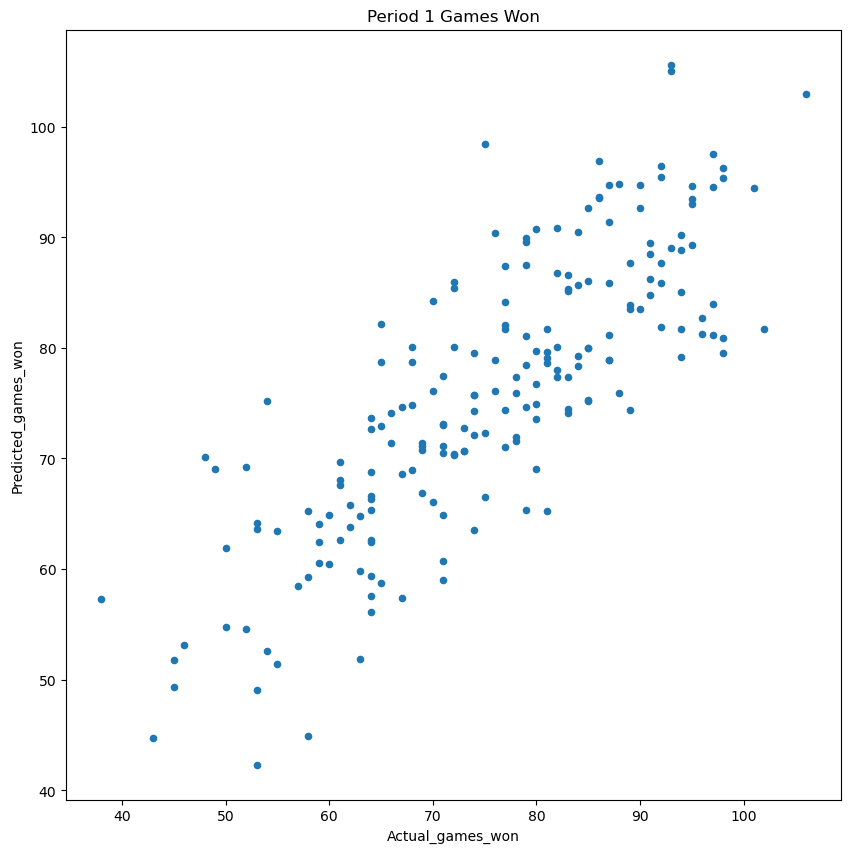

In [147]:
predict_values.plot(title='Period 1 Games Won',kind='scatter', x='Actual_games_won', y='Predicted_games_won', figsize=(10,10))

In [148]:
# To verify the accuracy of the model, error must be calculated
mae=metrics.mean_absolute_error(predict_values['Actual_games_won'], predict_values['Predicted_games_won'])
mse=metrics.mean_squared_error(predict_values['Actual_games_won'], predict_values['Predicted_games_won'])
rmse=np.sqrt(metrics.mean_squared_error(predict_values['Actual_games_won'], predict_values['Predicted_games_won']))

In [149]:
print(mae)

6.456539447130474


In [150]:
print(mse)

66.66868035115299


In [151]:
print(rmse)

8.165089120833464


# Period 2 Linear Regression

In [28]:
Period_2.head()

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance,Year_Team
703,1920,AL,BOS,BOS,NaN,5,154,76.0,72,81,...,39,461,481,183,131.0,0.97,Boston Red Sox,Fenway Park I,402445.0,1920-Boston Red Sox
704,1920,NL,BRO,LAD,NaN,1,155,78.0,93,61,...,25,327,553,226,118.0,0.96,Brooklyn Robins,Ebbets Field,808722.0,1920-Brooklyn Robins
705,1920,NL,BSN,ATL,NaN,7,153,74.0,62,90,...,39,415,368,239,125.0,0.96,Boston Braves,Braves Field,162483.0,1920-Boston Braves
706,1920,AL,CHA,CHW,NaN,2,154,77.0,96,58,...,45,405,438,194,142.0,0.96,Chicago White Sox,Comiskey Park,833492.0,1920-Chicago White Sox
707,1920,NL,CHN,CHC,NaN,5,154,77.0,75,79,...,37,382,508,225,112.0,0.96,Chicago Cubs,Wrigley Field,480783.0,1920-Chicago Cubs


In [29]:
Period_2.tail()

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance,Year_Team
1354,1960,NL,PHI,PHI,NaN,8,154,77.0,59,95,...,133,439,736,155,129.0,0.97,Philadelphia Phillies,Connie Mack Stadium,862205.0,1960-Philadelphia Phillies
1355,1960,NL,PIT,PIT,NaN,1,155,78.0,95,59,...,105,386,811,128,163.0,0.97,Pittsburgh Pirates,Forbes Field,1705828.0,1960-Pittsburgh Pirates
1356,1960,NL,SFN,SFG,NaN,5,156,77.0,79,75,...,107,512,897,165,117.0,0.97,San Francisco Giants,Candlestick Park,1795356.0,1960-San Francisco Giants
1357,1960,NL,SLN,STL,NaN,3,155,77.0,86,68,...,127,511,906,141,152.0,0.97,St. Louis Cardinals,Sportsman's Park IV,1096632.0,1960-St. Louis Cardinals
1358,1960,AL,WS1,MIN,NaN,5,154,77.0,73,81,...,130,538,775,165,159.0,0.97,Washington Senators,Griffith Stadium II,743404.0,1960-Washington Senators


In [30]:
Period_2.isnull().sum()

Year                     0
League                   0
Team                     0
Franchise                0
Division               656
Final_Standing           0
Games_Played             0
Unnamed: 7               0
Games_Won                0
Games_Lost               0
Unnamed: 10            656
Unnamed: 11            656
League_Win               0
World_Series             0
Runs_Scored              0
At_Bats                  0
Hits                     0
Doubles                  0
Triples                  0
Home_Runs                0
Walks                    0
Strike_Outs              0
Stolen_Bases             0
Caught_Stealing        200
Hit_By_Pitch           656
Sacrifice_Fly          656
Runs_Against             0
Earned_Runs              0
Earned_Run_Average       0
Complete_Games           0
Shutout                  0
Saves                    0
Infield_Put_Outs         0
Hits_Allowed             0
Home_Run_Allowed         0
Walks_Allowed            0
Strikeouts_Allowed       0
E

In [31]:
Period_2.columns

Index(['Year ', 'League', 'Team ', 'Franchise ', 'Division', 'Final_Standing',
       'Games_Played', 'Unnamed: 7', 'Games_Won', 'Games_Lost', 'Unnamed: 10',
       'Unnamed: 11', 'League_Win', 'World_Series', 'Runs_Scored', 'At_Bats',
       'Hits', 'Doubles', 'Triples', 'Home_Runs', 'Walks', 'Strike_Outs',
       'Stolen_Bases', 'Caught_Stealing', 'Hit_By_Pitch', 'Sacrifice_Fly',
       'Runs_Against', 'Earned_Runs', 'Earned_Run_Average', 'Complete_Games',
       'Shutout', 'Saves', 'Infield_Put_Outs', 'Hits_Allowed',
       'Home_Run_Allowed', 'Walks_Allowed', 'Strikeouts_Allowed', 'Errors',
       'Double_Plays', 'Fielding_Percentage', 'Team_Name', 'Home_Ball_Park',
       'Attendance', 'Year_Team'],
      dtype='object')

In [45]:
Period_2 = Period_2[['Games_Won','Runs_Against','Earned_Runs','Earned_Run_Average',
                     'Complete_Games','Shutout','Saves','Infield_Put_Outs',
                     'Hits_Allowed','Home_Run_Allowed','Walks_Allowed','Double_Plays',
                     'Strikeouts_Allowed','Errors','Fielding_Percentage',
                     'Runs_Scored','At_Bats','Hits','Doubles','Triples',
                     'Home_Runs','Walks','Strike_Outs','Stolen_Bases','Year_Team'
                    ]]

In [46]:
Period_2.head()

,Games_Won,Runs_Against,Earned_Runs,Earned_Run_Average,Complete_Games,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,...,Runs_Scored,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks,Strike_Outs,Stolen_Bases,Year_Team
703,72,698,592,3.82,92,11,6,4185,1481,39,...,650,5199,1397,216,71,22,533,429.0,98.0,1920-Boston Red Sox
704,93,528,415,2.62,89,17,10,4281,1381,25,...,660,5399,1493,205,99,28,359,391.0,70.0,1920-Brooklyn Robins
705,62,670,545,3.54,93,14,6,4158,1464,39,...,523,5218,1358,168,86,23,385,488.0,88.0,1920-Boston Braves
706,96,665,553,3.59,109,9,10,4158,1467,45,...,794,5328,1574,263,98,37,471,353.0,112.0,1920-Chicago White Sox
707,75,635,504,3.27,95,13,9,4164,1459,37,...,619,5117,1350,223,67,34,428,421.0,115.0,1920-Chicago Cubs


In [47]:
Period_2.tail()

,Games_Won,Runs_Against,Earned_Runs,Earned_Run_Average,Complete_Games,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,...,Runs_Scored,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks,Strike_Outs,Stolen_Bases,Year_Team
1354,59,691,613,4.01,45,6,16,4125,1423,133,...,546,5169,1235,196,44,99,448,1054.0,45.0,1960-Philadelphia Phillies
1355,95,593,543,3.49,47,11,33,4197,1363,105,...,734,5406,1493,236,56,120,486,747.0,34.0,1960-Pittsburgh Pirates
1356,79,631,534,3.44,55,16,26,4188,1288,107,...,671,5324,1357,220,62,130,467,846.0,86.0,1960-San Francisco Giants
1357,86,616,554,3.64,37,11,30,4113,1316,127,...,639,5187,1317,213,48,138,501,792.0,48.0,1960-St. Louis Cardinals
1358,73,696,589,3.77,34,10,35,4215,1392,130,...,672,5248,1283,205,43,147,584,883.0,52.0,1960-Washington Senators


In [48]:
x_train, x_test, y_train, y_test = train_test_split(Period_2, Period_2['Games_Won'],test_size=0.3, random_state=0)

In [49]:
x_test.describe()

,Games_Won,Runs_Against,Earned_Runs,Earned_Run_Average,Complete_Games,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,...,Fielding_Percentage,Runs_Scored,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks,Strike_Outs,Stolen_Bases
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.00000,197.000000,197.000000
mean,75.705584,712.456853,614.456853,4.023452,63.664975,9.781726,15.634518,4128.548223,1436.279188,91.989848,...,0.967817,701.695431,5307.482234,1430.182741,238.548223,57.284264,90.005076,505.77665,554.817259,63.446701
std,13.951250,105.549652,94.342593,0.645619,15.237221,4.549958,7.024623,64.928013,113.425190,36.224638,...,0.005786,95.807410,107.022103,101.064372,38.422516,19.560487,41.058880,90.28425,128.862437,31.790184
min,38.000000,482.000000,399.000000,2.550000,27.000000,2.000000,2.000000,3906.000000,1163.000000,25.000000,...,0.950000,494.000000,4898.000000,1205.000000,162.000000,19.000000,16.000000,313.00000,308.000000,13.000000
25%,65.000000,642.000000,548.000000,3.590000,53.000000,7.000000,11.000000,4092.000000,1367.000000,63.000000,...,0.960000,636.000000,5234.000000,1354.000000,212.000000,44.000000,59.000000,439.00000,463.000000,41.000000
50%,77.000000,701.000000,603.000000,3.950000,64.000000,9.000000,14.000000,4125.000000,1428.000000,86.000000,...,0.970000,707.000000,5302.000000,1415.000000,233.000000,54.000000,88.000000,504.00000,543.000000,57.000000
75%,86.000000,766.000000,661.000000,4.350000,76.000000,13.000000,20.000000,4173.000000,1502.000000,121.000000,...,0.970000,751.000000,5371.000000,1499.000000,261.000000,68.000000,116.000000,567.00000,632.000000,78.000000
max,106.000000,1045.000000,918.000000,6.130000,95.000000,26.000000,42.000000,4281.000000,1768.000000,187.000000,...,0.980000,981.000000,5586.000000,1693.000000,353.000000,122.000000,194.000000,783.00000,1054.000000,181.000000


In [50]:
x_train.describe()

,Games_Won,Runs_Against,Earned_Runs,Earned_Run_Average,Complete_Games,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,...,Fielding_Percentage,Runs_Scored,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks,Strike_Outs,Stolen_Bases
count,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,...,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000
mean,77.093682,712.339869,611.239651,3.999782,65.755991,9.470588,15.758170,4130.843137,1436.771242,89.673203,...,0.967756,716.958606,5314.642702,1439.769063,243.433551,57.710240,90.525054,521.108932,547.498911,62.694989
std,14.427425,104.411231,88.473563,0.606406,15.514937,4.207073,7.413866,61.380421,112.926407,33.390340,...,0.005721,110.425380,109.163867,110.679043,37.733284,18.394302,42.690786,94.040530,122.194551,28.234564
min,42.000000,475.000000,407.000000,2.570000,26.000000,1.000000,4.000000,3891.000000,1198.000000,26.000000,...,0.950000,394.000000,4949.000000,1174.000000,153.000000,19.000000,16.000000,283.000000,318.000000,16.000000
25%,66.000000,636.500000,547.500000,3.570000,55.000000,6.000000,10.000000,4086.000000,1359.500000,66.000000,...,0.960000,647.000000,5236.000000,1361.500000,216.000000,44.000000,56.000000,452.500000,462.500000,42.000000
50%,78.000000,706.000000,603.000000,3.950000,67.000000,9.000000,15.000000,4134.000000,1430.000000,84.000000,...,0.970000,705.000000,5301.000000,1431.000000,240.000000,56.000000,86.000000,510.000000,534.000000,59.000000
75%,88.000000,775.500000,671.000000,4.390000,76.000000,12.000000,20.000000,4173.000000,1509.000000,110.000000,...,0.970000,785.500000,5380.000000,1512.000000,266.000000,70.000000,119.000000,585.000000,616.000000,78.000000
max,111.000000,1199.000000,1023.000000,6.710000,109.000000,26.000000,42.000000,4299.000000,1993.000000,185.000000,...,0.980000,1067.000000,5667.000000,1783.000000,373.000000,116.000000,221.000000,835.000000,989.000000,191.000000


In [51]:
P2_corr = Period_2.corr(method='pearson', numeric_only = True)
round(P2_corr,2)

,Games_Won,Runs_Against,Earned_Runs,Earned_Run_Average,Complete_Games,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,...,Fielding_Percentage,Runs_Scored,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks,Strike_Outs,Stolen_Bases
Games_Won,1.00,-0.63,-0.61,-0.62,0.34,0.53,0.40,0.40,-0.49,-0.12,...,0.32,0.63,0.24,0.41,0.26,0.25,0.34,0.36,-0.06,0.17
Runs_Against,-0.63,1.00,0.97,0.97,-0.21,-0.72,-0.31,-0.42,0.85,0.20,...,-0.46,0.13,0.21,0.24,0.30,0.12,-0.10,-0.05,-0.10,-0.00
Earned_Runs,-0.61,0.97,1.00,1.00,-0.31,-0.70,-0.22,-0.41,0.77,0.35,...,-0.30,0.12,0.19,0.18,0.25,0.02,0.02,0.04,0.01,-0.09
Earned_Run_Average,-0.62,0.97,1.00,1.00,-0.30,-0.71,-0.23,-0.49,0.76,0.33,...,-0.31,0.11,0.14,0.16,0.24,0.01,0.01,0.03,-0.00,-0.09
Complete_Games,0.34,-0.21,-0.31,-0.30,1.00,0.22,-0.56,0.07,0.07,-0.63,...,-0.21,0.26,0.15,0.39,0.32,0.46,-0.39,-0.10,-0.59,0.39
Shutout,0.53,-0.72,-0.70,-0.71,0.22,1.00,0.23,0.36,-0.62,-0.17,...,0.36,-0.01,-0.07,-0.12,-0.16,-0.10,0.09,0.12,0.04,-0.02
Saves,0.40,-0.31,-0.22,-0.23,-0.56,0.23,1.00,0.21,-0.47,0.42,...,0.40,0.16,-0.07,-0.13,-0.16,-0.23,0.55,0.34,0.48,-0.19
Infield_Put_Outs,0.40,-0.42,-0.41,-0.49,0.07,0.36,0.21,1.00,-0.30,-0.03,...,0.25,0.04,0.42,0.03,-0.06,0.00,0.10,0.10,0.14,0.09
Hits_Allowed,-0.49,0.85,0.77,0.76,0.07,-0.62,-0.47,-0.30,1.00,-0.11,...,-0.52,0.17,0.32,0.43,0.43,0.32,-0.31,-0.25,-0.35,0.16
Home_Run_Allowed,-0.12,0.20,0.35,0.33,-0.63,-0.17,0.42,-0.03,-0.11,1.00,...,0.32,0.02,-0.05,-0.26,-0.23,-0.45,0.69,0.28,0.68,-0.39


In [65]:
lm2 = smf.ols(formula='Games_Won ~ Shutout + Hits + Runs_Scored - 1', data=x_train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          1.441e+04
Date:                Sat, 25 Nov 2023   Prob (F-statistic):                        0.00
Time:                        12:24:08   Log-Likelihood:                         -1606.6
No. Observations:                 459   AIC:                                      3219.
Df Residuals:                     456   BIC:                                      3231.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Shutout         1.8751      0.086     21.794      0.000       1.706       2.044
Hits           -0.0047      0.003     -1.763      0.079      -0.010       0.001
Runs_Scored     0.0921      0.005     17.910      0.000       0.082       0.102
==============================================================================
Omnibus:                        0.840   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.637
Skew:                          -0.023   Prob(JB):                        0.727
Kurtosis:                       3.177   Cond. No.                         370.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
lm2_predict=lm2.predict(x_test)
lm2_predict=round(lm2_predict)

In [67]:
lm2_predict.describe()

count    197.000000
mean      76.263959
std       12.464291
min       49.000000
25%       67.000000
50%       75.000000
75%       85.000000
max      119.000000
dtype: float64

In [68]:
lm2_predict=lm2.predict(x_test)
P2predict_values=pd.concat([x_test['Games_Won'],x_test['Year_Team'],lm2_predict],axis=1).set_index('Year_Team')
P2predict_values.columns=["Actual_games_won","Predicted_games_won"]
P2predict_values["Residual"]=P2predict_values["Actual_games_won"]-P2predict_values["Predicted_games_won"]

In [69]:
P2predict_values.head()

,Actual_games_won,Predicted_games_won,Residual
Year_Team,,,
1959-St. Louis Cardinals,71,67.319428,3.680572
1950-Pittsburgh Pirates,57,67.383782,-10.383782
1920-St. Louis Cardinals,75,71.589942,3.410058
1935-Detroit Tigers,93,107.259998,-14.259998
1925-Cincinnati Reds,80,77.185355,2.814645


<Axes: title={'center': 'Period 2 Games Won'}, xlabel='Actual_games_won', ylabel='Predicted_games_won'>

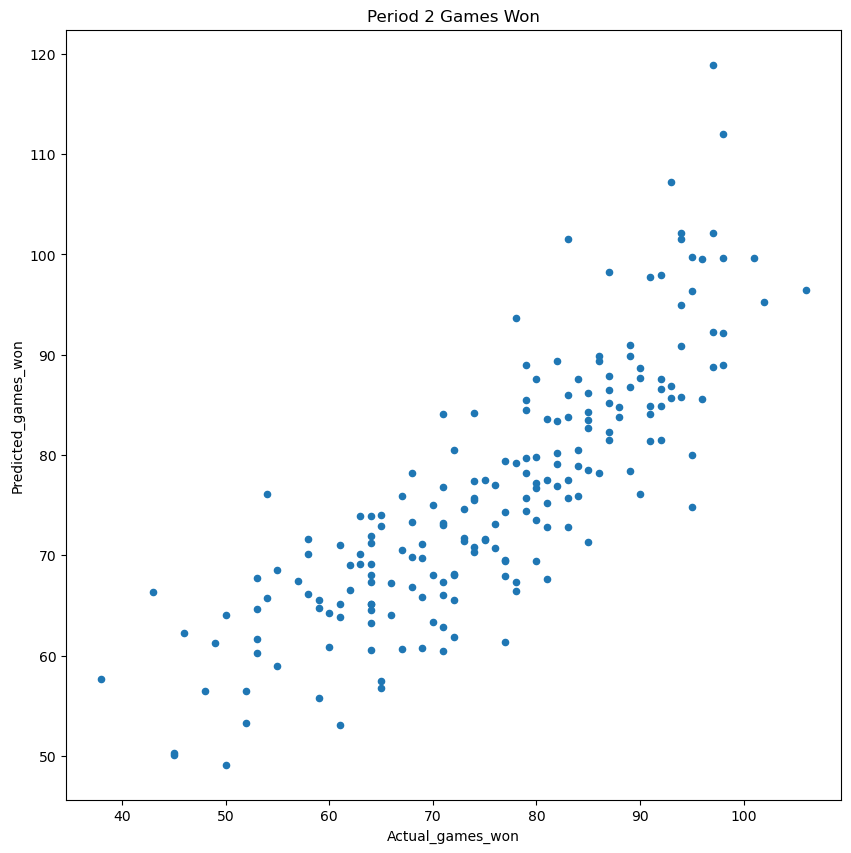

In [70]:
P2predict_values.plot(title='Period 2 Games Won',kind='scatter', x='Actual_games_won', y='Predicted_games_won', figsize=(10,10))

In [73]:
mae=metrics.mean_absolute_error(P2predict_values['Actual_games_won'], P2predict_values['Predicted_games_won'])
mse=metrics.mean_squared_error(P2predict_values['Actual_games_won'], P2predict_values['Predicted_games_won'])
rmse=np.sqrt(metrics.mean_squared_error(P2predict_values['Actual_games_won'], P2predict_values['Predicted_games_won']))

In [74]:
print(mae)

6.280835214711439


In [75]:
print(mse)

61.05021884651628


In [76]:
print(rmse)

7.813463946708674


# Period 3 Linear Regression

In [77]:
Period_3.isnull().sum()

Year                     0
League                   0
Team                     0
Franchise                0
Division               174
Final_Standing           0
Games_Played             0
Unnamed: 7               0
Games_Won                0
Games_Lost               0
Unnamed: 10            174
Unnamed: 11            730
League_Win               0
World_Series             0
Runs_Scored              0
At_Bats                  0
Hits                     0
Doubles                  0
Triples                  0
Home_Runs                0
Walks                    0
Strike_Outs              0
Stolen_Bases             0
Caught_Stealing          0
Hit_By_Pitch           730
Sacrifice_Fly          730
Runs_Against             0
Earned_Runs              0
Earned_Run_Average       0
Complete_Games           0
Shutout                  0
Saves                    0
Infield_Put_Outs         0
Hits_Allowed             0
Home_Run_Allowed         0
Walks_Allowed            0
Strikeouts_Allowed       0
E

In [78]:
Period_3.columns

Index(['Year ', 'League', 'Team ', 'Franchise ', 'Division', 'Final_Standing',
       'Games_Played', 'Unnamed: 7', 'Games_Won', 'Games_Lost', 'Unnamed: 10',
       'Unnamed: 11', 'League_Win', 'World_Series', 'Runs_Scored', 'At_Bats',
       'Hits', 'Doubles', 'Triples', 'Home_Runs', 'Walks', 'Strike_Outs',
       'Stolen_Bases', 'Caught_Stealing', 'Hit_By_Pitch', 'Sacrifice_Fly',
       'Runs_Against', 'Earned_Runs', 'Earned_Run_Average', 'Complete_Games',
       'Shutout', 'Saves', 'Infield_Put_Outs', 'Hits_Allowed',
       'Home_Run_Allowed', 'Walks_Allowed', 'Strikeouts_Allowed', 'Errors',
       'Double_Plays', 'Fielding_Percentage', 'Team_Name', 'Home_Ball_Park',
       'Attendance', 'Year_Team'],
      dtype='object')

In [79]:
Period_3 = Period_3[['Games_Won','Runs_Against','Earned_Runs','Earned_Run_Average',
                     'Complete_Games','Shutout','Saves','Infield_Put_Outs', 'Caught_Stealing',
                     'Hits_Allowed','Home_Run_Allowed','Walks_Allowed','Double_Plays',
                     'Strikeouts_Allowed','Errors','Fielding_Percentage',
                     'Runs_Scored','At_Bats','Hits','Doubles','Triples',
                     'Home_Runs','Walks','Strike_Outs','Stolen_Bases','Year_Team'
                    ]]


In [80]:
x_train, x_test, y_train, y_test = train_test_split(Period_3, Period_3['Games_Won'],test_size=0.3, random_state=0)

In [81]:
x_test.describe()

,Games_Won,Runs_Against,Earned_Runs,Earned_Run_Average,Complete_Games,Shutout,Saves,Infield_Put_Outs,Caught_Stealing,Hits_Allowed,...,Fielding_Percentage,Runs_Scored,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks,Strike_Outs,Stolen_Bases
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,78.849315,664.018265,588.484018,3.723014,34.324201,10.812785,32.210046,4268.063927,52.200913,1372.694064,...,0.973333,661.739726,5388.091324,1373.831050,225.342466,37.114155,126.000000,512.977169,856.671233,98.410959
std,13.297242,101.040003,90.319380,0.503243,14.211376,4.824120,10.262682,310.154572,16.732263,137.651776,...,0.005008,94.137616,407.137232,135.892476,33.554236,10.013327,37.169954,73.364582,131.407873,43.371079
min,37.000000,343.000000,305.000000,2.490000,6.000000,2.000000,10.000000,2826.000000,11.000000,827.000000,...,0.960000,329.000000,3521.000000,797.000000,119.000000,16.000000,47.000000,275.000000,434.000000,18.000000
25%,70.000000,610.000000,533.500000,3.400000,24.000000,7.000000,25.000000,4294.500000,42.500000,1318.000000,...,0.970000,608.000000,5398.500000,1333.500000,203.000000,29.500000,99.000000,473.500000,792.500000,66.000000
50%,81.000000,669.000000,593.000000,3.720000,35.000000,10.000000,31.000000,4338.000000,52.000000,1396.000000,...,0.970000,676.000000,5489.000000,1397.000000,225.000000,36.000000,124.000000,516.000000,864.000000,95.000000
75%,87.500000,727.000000,653.000000,4.060000,44.000000,14.000000,39.000000,4378.500000,62.000000,1459.000000,...,0.980000,723.500000,5540.500000,1451.000000,251.000000,44.000000,149.500000,562.500000,945.500000,125.500000
max,109.000000,948.000000,801.000000,5.040000,70.000000,30.000000,68.000000,4479.000000,112.000000,1593.000000,...,0.980000,891.000000,5733.000000,1620.000000,298.000000,68.000000,221.000000,684.000000,1154.000000,262.000000


In [82]:
x_train.describe()

,Games_Won,Runs_Against,Earned_Runs,Earned_Run_Average,Complete_Games,Shutout,Saves,Infield_Put_Outs,Caught_Stealing,Hits_Allowed,...,Fielding_Percentage,Runs_Scored,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks,Strike_Outs,Stolen_Bases
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,79.978474,667.221135,591.772994,3.718669,33.958904,11.203523,33.571429,4297.667319,52.307241,1385.874755,...,0.973209,668.197652,5425.397260,1385.309198,225.272016,36.919765,125.982387,515.636008,862.168297,99.710372
std,12.300547,87.987120,80.698321,0.463291,14.219025,4.409623,9.099789,260.656695,17.792307,116.707595,...,0.004756,91.572911,337.304158,119.112676,34.188554,11.183120,34.220646,73.784640,122.489964,48.437166
min,41.000000,331.000000,293.000000,2.450000,6.000000,1.000000,12.000000,2767.000000,11.000000,840.000000,...,0.960000,348.000000,3493.000000,868.000000,133.000000,11.000000,32.000000,295.000000,379.000000,16.000000
25%,72.000000,612.000000,539.000000,3.370000,23.000000,8.000000,27.000000,4306.500000,39.500000,1337.500000,...,0.970000,616.000000,5419.000000,1328.500000,203.000000,29.000000,102.000000,469.500000,801.000000,64.000000
50%,81.000000,671.000000,595.000000,3.710000,33.000000,11.000000,33.000000,4350.000000,51.000000,1402.000000,...,0.970000,673.000000,5489.000000,1397.000000,224.000000,35.000000,125.000000,513.000000,870.000000,91.000000
75%,89.000000,725.000000,646.500000,4.040000,44.000000,14.000000,41.000000,4383.000000,62.000000,1455.000000,...,0.980000,730.000000,5545.000000,1459.000000,248.000000,43.500000,148.000000,563.000000,939.500000,131.000000
max,109.000000,957.000000,834.000000,5.280000,94.000000,28.000000,64.000000,4518.000000,123.000000,1636.000000,...,0.980000,896.000000,5767.000000,1633.000000,326.000000,79.000000,240.000000,729.000000,1203.000000,341.000000


In [83]:
P3_corr = Period_3.corr(method='pearson', numeric_only = True)
round(P3_corr,2)

,Games_Won,Runs_Against,Earned_Runs,Earned_Run_Average,Complete_Games,Shutout,Saves,Infield_Put_Outs,Caught_Stealing,Hits_Allowed,...,Fielding_Percentage,Runs_Scored,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks,Strike_Outs,Stolen_Bases
Games_Won,1.00,-0.25,-0.23,-0.48,0.30,0.45,0.50,0.46,0.04,0.03,...,0.25,0.67,0.46,0.57,0.41,0.23,0.43,0.40,0.13,0.20
Runs_Against,-0.25,1.00,0.99,0.87,-0.19,-0.53,-0.04,0.44,0.07,0.85,...,-0.20,0.42,0.54,0.49,0.39,0.09,0.33,0.32,0.26,0.00
Earned_Runs,-0.23,0.99,1.00,0.90,-0.21,-0.55,-0.00,0.42,0.06,0.84,...,-0.11,0.44,0.52,0.50,0.42,0.08,0.36,0.32,0.23,0.01
Earned_Run_Average,-0.48,0.87,0.90,1.00,-0.32,-0.69,-0.12,-0.02,-0.00,0.60,...,-0.11,0.24,0.11,0.20,0.26,-0.02,0.24,0.13,-0.01,-0.05
Complete_Games,0.30,-0.19,-0.21,-0.32,1.00,0.43,-0.51,0.19,-0.17,-0.06,...,-0.06,0.10,0.16,0.12,-0.16,0.09,0.08,0.10,-0.06,-0.24
Shutout,0.45,-0.53,-0.55,-0.69,0.43,1.00,0.02,0.18,-0.02,-0.31,...,0.09,-0.07,0.10,0.01,-0.10,0.04,-0.12,-0.04,0.09,0.00
Saves,0.50,-0.04,-0.00,-0.12,-0.51,0.02,1.00,0.24,0.13,0.08,...,0.20,0.38,0.24,0.32,0.37,0.09,0.25,0.17,0.19,0.29
Infield_Put_Outs,0.46,0.44,0.42,-0.02,0.19,0.18,0.24,1.00,0.15,0.68,...,-0.03,0.51,0.97,0.72,0.41,0.22,0.31,0.46,0.56,0.14
Caught_Stealing,0.04,0.07,0.06,-0.00,-0.17,-0.02,0.13,0.15,1.00,0.13,...,-0.05,0.04,0.10,0.13,0.18,0.15,-0.22,0.06,0.01,0.73
Hits_Allowed,0.03,0.85,0.84,0.60,-0.06,-0.31,0.08,0.68,0.13,1.00,...,-0.13,0.52,0.76,0.69,0.49,0.19,0.31,0.37,0.29,0.08


In [122]:
lm3 = smf.ols(formula='Games_Won ~ Runs_Scored + Saves + Shutout - 1', data=x_train).fit()
lm3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.627e+04
Date:                Sat, 25 Nov 2023   Prob (F-statistic):                        0.00
Time:                        12:40:57   Log-Likelihood:                         -1578.9
No. Observations:                 459   AIC:                                      3164.
Df Residuals:                     456   BIC:                                      3176.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Runs_Scored     0.0770      0.001     56.028      0.000       0.074       0.080
Saves           0.3882      0.049      7.874      0.000       0.291       0.485
Shutout         1.6689      0.082     20.449      0.000       1.508       1.829
==============================================================================
Omnibus:                        0.836   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.652
Skew:                           0.072   Prob(JB):                        0.722
Kurtosis:                       3.115   Cond. No.                         171.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
lm3_predict=lm3.predict(x_test)
lm3_predict=round(lm3_predict)

In [86]:
lm3_predict.describe()

count    219.000000
mean      77.936073
std       14.722370
min       26.000000
25%       70.500000
50%       79.000000
75%       87.500000
max      113.000000
dtype: float64

In [87]:
lm3_predict=lm3.predict(x_test)
P3predict_values=pd.concat([x_test['Games_Won'],x_test['Year_Team'],lm3_predict],axis=1).set_index('Year_Team')
P3predict_values.columns=["Actual_games_won","Predicted_games_won"]
P3predict_values["Residual"]=P3predict_values["Actual_games_won"]-P3predict_values["Predicted_games_won"]

In [88]:
P3predict_values.head()

,Actual_games_won,Predicted_games_won,Residual
Year_Team,,,
1969-St. Louis Cardinals,87,71.823458,15.176542
1969-Montreal Expos,52,58.564674,-6.564674
1960-St. Louis Cardinals,86,74.512230,11.487770
1961-San Francisco Giants,85,92.316681,-7.316681
1977-Texas Rangers,94,93.294500,0.705500


<Axes: title={'center': 'Period 3 Games Won'}, xlabel='Actual_games_won', ylabel='Predicted_games_won'>

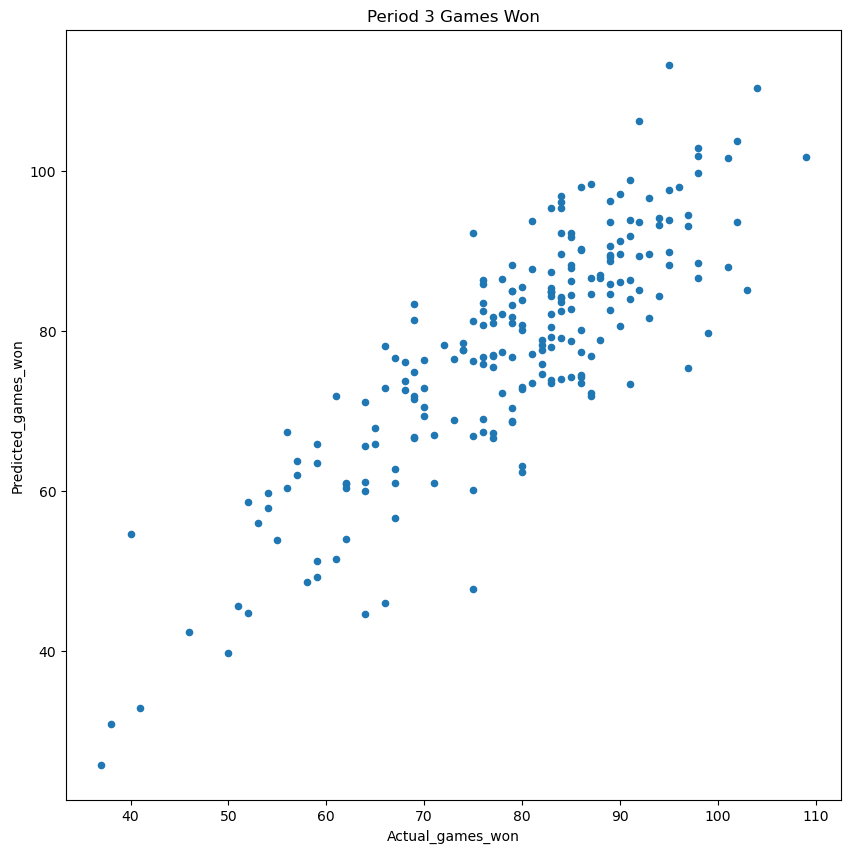

In [89]:
P3predict_values.plot(title='Period 3 Games Won',kind='scatter', x='Actual_games_won', y='Predicted_games_won', figsize=(10,10))

In [90]:
mae=metrics.mean_absolute_error(P2predict_values['Actual_games_won'], P2predict_values['Predicted_games_won'])
mse=metrics.mean_squared_error(P2predict_values['Actual_games_won'], P2predict_values['Predicted_games_won'])
rmse=np.sqrt(metrics.mean_squared_error(P2predict_values['Actual_games_won'], P2predict_values['Predicted_games_won']))

In [91]:
print(mae)

6.280835214711439


In [92]:
print(mse)

61.05021884651628


In [93]:
print(rmse)

7.813463946708674


# Period 4 Linear Regression

In [94]:
Period_4.isnull().sum()

Year                     0
League                   0
Team                     0
Franchise                0
Division                 0
Final_Standing           0
Games_Played             0
Unnamed: 7               0
Games_Won                0
Games_Lost               0
Unnamed: 10             28
Unnamed: 11            134
League_Win              28
World_Series            28
Runs_Scored              0
At_Bats                  0
Hits                     0
Doubles                  0
Triples                  0
Home_Runs                0
Walks                    0
Strike_Outs              0
Stolen_Bases             0
Caught_Stealing          0
Hit_By_Pitch           278
Sacrifice_Fly          278
Runs_Against             0
Earned_Runs              0
Earned_Run_Average       0
Complete_Games           0
Shutout                  0
Saves                    0
Infield_Put_Outs         0
Hits_Allowed             0
Home_Run_Allowed         0
Walks_Allowed            0
Strikeouts_Allowed       0
E

In [95]:
Period_4.columns

Index(['Year ', 'League', 'Team ', 'Franchise ', 'Division', 'Final_Standing',
       'Games_Played', 'Unnamed: 7', 'Games_Won', 'Games_Lost', 'Unnamed: 10',
       'Unnamed: 11', 'League_Win', 'World_Series', 'Runs_Scored', 'At_Bats',
       'Hits', 'Doubles', 'Triples', 'Home_Runs', 'Walks', 'Strike_Outs',
       'Stolen_Bases', 'Caught_Stealing', 'Hit_By_Pitch', 'Sacrifice_Fly',
       'Runs_Against', 'Earned_Runs', 'Earned_Run_Average', 'Complete_Games',
       'Shutout', 'Saves', 'Infield_Put_Outs', 'Hits_Allowed',
       'Home_Run_Allowed', 'Walks_Allowed', 'Strikeouts_Allowed', 'Errors',
       'Double_Plays', 'Fielding_Percentage', 'Team_Name', 'Home_Ball_Park',
       'Attendance', 'Year_Team'],
      dtype='object')

In [96]:
Period_4 = Period_4[['Games_Won','Runs_Against','Earned_Runs','Earned_Run_Average',
                     'Complete_Games','Shutout','Saves','Infield_Put_Outs',
                     'Hits_Allowed','Home_Run_Allowed','Walks_Allowed','Double_Plays',
                     'Strikeouts_Allowed','Errors','Fielding_Percentage',
                     'Runs_Scored','At_Bats','Hits','Doubles','Triples',
                     'Home_Runs','Walks','Strike_Outs','Stolen_Bases','Year_Team'
                    ]]


In [97]:
Period_4.head()

,Games_Won,Runs_Against,Earned_Runs,Earned_Run_Average,Complete_Games,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,...,Runs_Scored,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks,Strike_Outs,Stolen_Bases,Year_Team
2047,65,821,727,4.58,17,8,30,4287,1527,128,...,682,5504,1376,263,26,162,473,1010.0,92.0,1990-Atlanta Braves
2048,76,698,644,4.04,10,5,43,4305,1445,161,...,669,5410,1328,234,22,132,660,962.0,94.0,1990-Baltimore Orioles
2049,88,664,596,3.72,15,13,44,4326,1439,92,...,699,5516,1502,298,31,106,598,795.0,53.0,1990-Boston Red Sox
2050,80,706,612,3.79,21,13,42,4362,1482,106,...,690,5570,1448,237,27,147,566,1000.0,69.0,1990-California Angels
2051,94,633,581,3.61,17,10,68,4347,1313,106,...,682,5402,1393,251,44,106,478,903.0,140.0,1990-Chicago White Sox


In [98]:
x_train, x_test, y_train, y_test = train_test_split(Period_2, Period_2['Games_Won'],test_size=0.3, random_state=0)

In [99]:
x_test.describe()

,Games_Won,Runs_Against,Earned_Runs,Earned_Run_Average,Complete_Games,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,...,Fielding_Percentage,Runs_Scored,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks,Strike_Outs,Stolen_Bases
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.00000,197.000000,197.000000
mean,75.705584,712.456853,614.456853,4.023452,63.664975,9.781726,15.634518,4128.548223,1436.279188,91.989848,...,0.967817,701.695431,5307.482234,1430.182741,238.548223,57.284264,90.005076,505.77665,554.817259,63.446701
std,13.951250,105.549652,94.342593,0.645619,15.237221,4.549958,7.024623,64.928013,113.425190,36.224638,...,0.005786,95.807410,107.022103,101.064372,38.422516,19.560487,41.058880,90.28425,128.862437,31.790184
min,38.000000,482.000000,399.000000,2.550000,27.000000,2.000000,2.000000,3906.000000,1163.000000,25.000000,...,0.950000,494.000000,4898.000000,1205.000000,162.000000,19.000000,16.000000,313.00000,308.000000,13.000000
25%,65.000000,642.000000,548.000000,3.590000,53.000000,7.000000,11.000000,4092.000000,1367.000000,63.000000,...,0.960000,636.000000,5234.000000,1354.000000,212.000000,44.000000,59.000000,439.00000,463.000000,41.000000
50%,77.000000,701.000000,603.000000,3.950000,64.000000,9.000000,14.000000,4125.000000,1428.000000,86.000000,...,0.970000,707.000000,5302.000000,1415.000000,233.000000,54.000000,88.000000,504.00000,543.000000,57.000000
75%,86.000000,766.000000,661.000000,4.350000,76.000000,13.000000,20.000000,4173.000000,1502.000000,121.000000,...,0.970000,751.000000,5371.000000,1499.000000,261.000000,68.000000,116.000000,567.00000,632.000000,78.000000
max,106.000000,1045.000000,918.000000,6.130000,95.000000,26.000000,42.000000,4281.000000,1768.000000,187.000000,...,0.980000,981.000000,5586.000000,1693.000000,353.000000,122.000000,194.000000,783.00000,1054.000000,181.000000


In [100]:
x_train.describe()

,Games_Won,Runs_Against,Earned_Runs,Earned_Run_Average,Complete_Games,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,...,Fielding_Percentage,Runs_Scored,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks,Strike_Outs,Stolen_Bases
count,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,...,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000
mean,77.093682,712.339869,611.239651,3.999782,65.755991,9.470588,15.758170,4130.843137,1436.771242,89.673203,...,0.967756,716.958606,5314.642702,1439.769063,243.433551,57.710240,90.525054,521.108932,547.498911,62.694989
std,14.427425,104.411231,88.473563,0.606406,15.514937,4.207073,7.413866,61.380421,112.926407,33.390340,...,0.005721,110.425380,109.163867,110.679043,37.733284,18.394302,42.690786,94.040530,122.194551,28.234564
min,42.000000,475.000000,407.000000,2.570000,26.000000,1.000000,4.000000,3891.000000,1198.000000,26.000000,...,0.950000,394.000000,4949.000000,1174.000000,153.000000,19.000000,16.000000,283.000000,318.000000,16.000000
25%,66.000000,636.500000,547.500000,3.570000,55.000000,6.000000,10.000000,4086.000000,1359.500000,66.000000,...,0.960000,647.000000,5236.000000,1361.500000,216.000000,44.000000,56.000000,452.500000,462.500000,42.000000
50%,78.000000,706.000000,603.000000,3.950000,67.000000,9.000000,15.000000,4134.000000,1430.000000,84.000000,...,0.970000,705.000000,5301.000000,1431.000000,240.000000,56.000000,86.000000,510.000000,534.000000,59.000000
75%,88.000000,775.500000,671.000000,4.390000,76.000000,12.000000,20.000000,4173.000000,1509.000000,110.000000,...,0.970000,785.500000,5380.000000,1512.000000,266.000000,70.000000,119.000000,585.000000,616.000000,78.000000
max,111.000000,1199.000000,1023.000000,6.710000,109.000000,26.000000,42.000000,4299.000000,1993.000000,185.000000,...,0.980000,1067.000000,5667.000000,1783.000000,373.000000,116.000000,221.000000,835.000000,989.000000,191.000000


In [101]:
P4_corr = Period_4.corr(method='pearson', numeric_only = True)
round(P4_corr,2)

,Games_Won,Runs_Against,Earned_Runs,Earned_Run_Average,Complete_Games,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,...,Fielding_Percentage,Runs_Scored,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks,Strike_Outs,Stolen_Bases
Games_Won,1.00,-0.30,-0.27,-0.55,0.08,0.53,0.70,0.48,-0.01,-0.12,...,0.28,0.63,0.45,0.55,0.39,0.04,0.42,0.54,0.13,0.16
Runs_Against,-0.30,1.00,0.99,0.85,-0.25,-0.42,-0.24,0.38,0.86,0.76,...,-0.05,0.41,0.49,0.49,0.40,0.06,0.36,0.18,0.39,-0.09
Earned_Runs,-0.27,0.99,1.00,0.86,-0.28,-0.41,-0.22,0.37,0.85,0.79,...,0.04,0.43,0.49,0.50,0.42,0.05,0.39,0.19,0.39,-0.10
Earned_Run_Average,-0.55,0.85,0.86,1.00,-0.28,-0.63,-0.46,-0.14,0.54,0.68,...,-0.05,0.20,-0.01,0.12,0.17,-0.03,0.26,-0.03,0.12,-0.19
Complete_Games,0.08,-0.25,-0.28,-0.28,1.00,0.24,-0.07,-0.03,-0.19,-0.37,...,-0.37,-0.11,-0.08,-0.11,-0.27,0.05,-0.22,0.03,-0.33,0.18
Shutout,0.53,-0.42,-0.41,-0.63,0.24,1.00,0.37,0.37,-0.15,-0.34,...,0.17,0.04,0.29,0.16,0.10,0.06,-0.06,0.12,0.08,0.09
Saves,0.70,-0.24,-0.22,-0.46,-0.07,0.37,1.00,0.41,0.02,-0.13,...,0.14,0.27,0.35,0.32,0.17,0.06,0.16,0.27,0.07,0.19
Infield_Put_Outs,0.48,0.38,0.37,-0.14,-0.03,0.37,0.41,1.00,0.68,0.29,...,0.17,0.46,0.98,0.76,0.51,0.15,0.27,0.42,0.53,0.14
Hits_Allowed,-0.01,0.86,0.85,0.54,-0.19,-0.15,0.02,0.68,1.00,0.63,...,0.05,0.48,0.75,0.68,0.50,0.11,0.34,0.28,0.46,-0.01
Home_Run_Allowed,-0.12,0.76,0.79,0.68,-0.37,-0.34,-0.13,0.29,0.63,1.00,...,0.20,0.46,0.40,0.44,0.41,0.00,0.47,0.19,0.39,-0.10


In [123]:
lm4 = smf.ols(formula='Games_Won ~ Saves + Runs_Scored + Shutout - 1', data=x_train).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.627e+04
Date:                Sat, 25 Nov 2023   Prob (F-statistic):                        0.00
Time:                        12:43:53   Log-Likelihood:                         -1578.9
No. Observations:                 459   AIC:                                      3164.
Df Residuals:                     456   BIC:                                      3176.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Saves           0.3882      0.049      7.874      0.000       0.291       0.485
Runs_Scored     0.0770      0.001     56.028      0.000       0.074       0.080
Shutout         1.6689      0.082     20.449      0.000       1.508       1.829
==============================================================================
Omnibus:                        0.836   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.652
Skew:                           0.072   Prob(JB):                        0.722
Kurtosis:                       3.115   Cond. No.                         171.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
lm4_predict=lm4.predict(x_test)
lm4_predict=round(lm4_predict)

In [125]:
lm4_predict.describe()

count    197.000000
mean      76.431472
std       12.015365
min       50.000000
25%       68.000000
50%       75.000000
75%       84.000000
max      120.000000
dtype: float64

In [126]:
lm4_predict=lm4.predict(x_test)
P4predict_values=pd.concat([x_test['Games_Won'],x_test['Year_Team'],lm4_predict],axis=1).set_index('Year_Team')
P4predict_values.columns=["Actual_games_won","Predicted_games_won"]
P4predict_values["Residual"]=P4predict_values["Actual_games_won"]-P4predict_values["Predicted_games_won"]

In [127]:
P4predict_values.head()

,Actual_games_won,Predicted_games_won,Residual
Year_Team,,,
1959-St. Louis Cardinals,71,70.883407,0.116593
1950-Pittsburgh Pirates,57,68.685909,-11.685909
1920-St. Louis Cardinals,75,71.677354,3.322646
1935-Detroit Tigers,93,101.767759,-8.767759
1925-Cincinnati Reds,80,76.170612,3.829388


<Axes: title={'center': 'Period 4 Games Won'}, xlabel='Actual_games_won', ylabel='Predicted_games_won'>

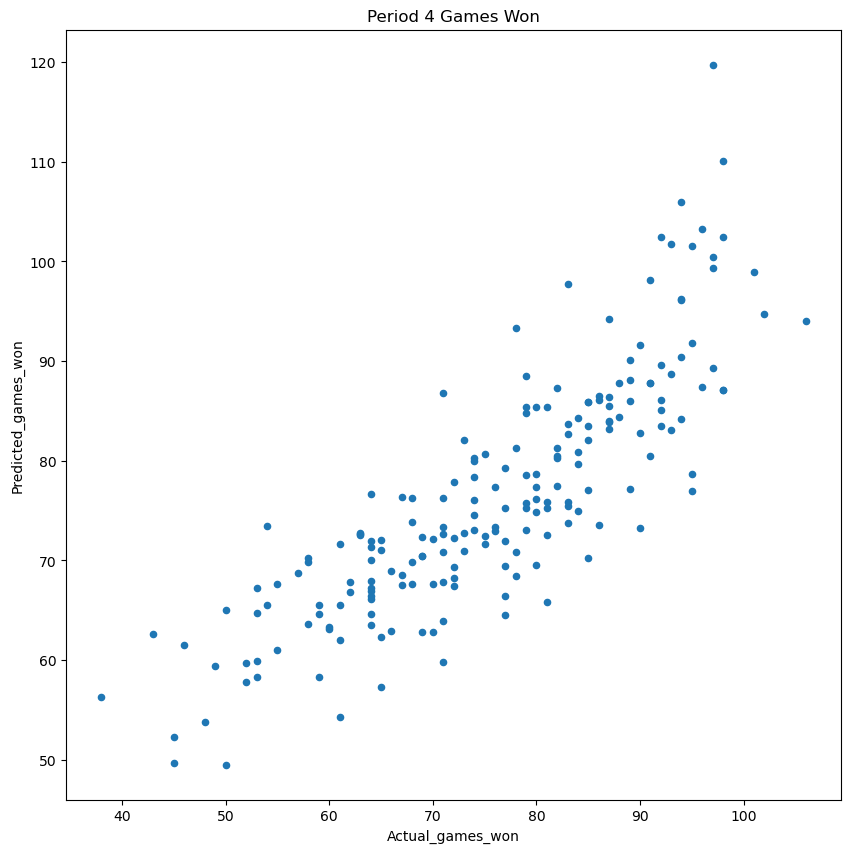

In [128]:
P4predict_values.plot(title='Period 4 Games Won',kind='scatter', x='Actual_games_won', y='Predicted_games_won', figsize=(10,10))

In [108]:
mae=metrics.mean_absolute_error(P4predict_values['Actual_games_won'], P4predict_values['Predicted_games_won'])
mse=metrics.mean_squared_error(P4predict_values['Actual_games_won'], P4predict_values['Predicted_games_won'])
rmse=np.sqrt(metrics.mean_squared_error(P4predict_values['Actual_games_won'], P4predict_values['Predicted_games_won']))

In [109]:
print(mae)

6.0325151269838875


In [110]:
print(mse)

57.63688852004191


In [111]:
print(rmse)

7.591896240073484


# Evaluation of the regression models:
In my analyses, achieving an R-squared value close to 99% suggests that a team's success is contingent upon the synergistic improvement of both offensive and defensive capabilities. To elaborate, teams need to substantially enhance their defensive prowess while simultaneously sustaining a strong offensive performance. This conclusion is substantiated by the model-derived formula. Each model incorporates a constrained intercept to enhance precision.

In my findings, it is crucial for each variable in the models to exhibit compatibility with each other by synchronization of their correlation coefficient. This ensures a harmonious relationship among the variables. The model distributions demonstrate a well-balanced pattern, with gaps closely aligned to the incline.

### Forecasting New York Yankees and Toronto Blue Jays

In [129]:
df = pd.read_csv('baseball_teams.csv')

In [130]:
lmp = smf.ols(formula='Games_Won ~ Saves  + Runs_Scored + Shutout - 1', data=df).fit()

In [131]:
lmp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          9.632e+04
Date:                Sat, 25 Nov 2023   Prob (F-statistic):                        0.00
Time:                        12:44:48   Log-Likelihood:                         -9641.8
No. Observations:                2805   AIC:                                  1.929e+04
Df Residuals:                    2802   BIC:                                  1.931e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Saves           0.2779      0.009     30.088      0.000       0.260       0.296
Runs_Scored     0.0753      0.000    152.338      0.000       0.074       0.076
Shutout         1.7510      0.026     66.499      0.000       1.699       1.803
==============================================================================
Omnibus:                        1.164   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.559   Jarque-Bera (JB):                1.091
Skew:                           0.039   Prob(JB):                        0.579
Kurtosis:                       3.057   Cond. No.                         129.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
df_NYY_TOR = df[((df['Year '] == 2012) | (df['Year '] == 2015)) & ((df['Team '] == 'NYA') | (df['Team '] == 'TOR'))]

In [133]:
df_NYY_TOR.head()

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
2702,2012,AL,NYA,NYY,E,1,162,81.0,95,67,...,1401,190,431,1318,75,135.0,0.987,New York Yankees,Yankee Stadium III,3542406.0
2713,2012,AL,TOR,TOR,E,4,162,81.0,73,89,...,1439,204,574,1142,101,167.0,0.984,Toronto Blue Jays,Rogers Centre,2099663.0
2780,2015,AL,TOR,TOR,E,1,162,81.0,93,69,...,1353,173,397,1117,88,145.0,0.985,Toronto Blue Jays,Rogers Centre,2794891.0
2781,2015,AL,NYA,NYY,E,2,162,81.0,87,75,...,1416,182,474,1370,93,135.0,0.985,New York Yankees,Yankee Stadium III,3193795.0


In [134]:
x_values=df_NYY_TOR[['Runs_Scored','At_Bats','Hits','Doubles','Triples','Shutout','Saves']]

In [135]:
lmp_predict=lmp.predict(x_values)

In [136]:
lmp_predict.head()

2702    90.452875
2713    81.216221
2780    94.027603
2781    77.853201
dtype: float64

In [137]:
TeamGW=pd.concat([df_NYY_TOR['Games_Won'], lmp_predict],axis=1)
TeamGW.columns=["Actual_games_won","Predicted_games_won"]
TeamGW["Residual"]=TeamGW["Actual_games_won"]-TeamGW["Predicted_games_won"]
TeamGW['Team ']=df_NYY_TOR['Team ']
TeamGW['Team ']=df_NYY_TOR['Year ']
TeamGW.head()

,Actual_games_won,Predicted_games_won,Residual,Team
2702,95,90.452875,4.547125,2012
2713,73,81.216221,-8.216221,2012
2780,93,94.027603,-1.027603,2015
2781,87,77.853201,9.146799,2015


In [403]:
rmse=np.sqrt(metrics.mean_squared_error(TeamGW['Actual_games_won'], TeamGW['Predicted_games_won']))

In [404]:
print(rmse)

6.5746202291218045


#### Based on this result, On average, my predictions are off by approximately 6.57 games. Given the number of actual games won I would consider this error tolerable.

# 

# Project Report:
In developing project sprint 2, I first struggle to clean my data. Everytime I executed my cells, I would always have error showing my lack   of knowledge in coding. I was able to overcome it through the guidance of weekly labs.
In the process of constructing I contemplate on whether to include variables that had missing values. I eventually removed variables containing null as a part of my linear regression structure. I tried to include it in my correlation analysis and I find that the coefficient was close to 1 but in my mind this might be caused by the variables missing units which made it unreliable.
Selecting the indepent variables in models was based to the r2, pvalue, and fstatic of the variable. Correlation analysis was a huge factor also in formulating the variables output. I was able to recognize what variables to put by balancing each one to their relationship.
RMSE is a great tool for measuring error metrics. With RMSE you are able to measure your estimations accuracy which is very benificial as it allows you to alter your model for optimal results.
In conclusion, Linear regression is an outstanding method in for Prediction
as it serves as a baseline for comparison, it illustrates the relationship of independent and dependent variable to the strength of the output, and it provides statistical measures for assumptions accuracy.

# Group: 7

# Names: 
#     - Jann Adriane Ligason
#     - Bubune Eli Dzantor